In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Log_reg.csv")

In [210]:
df.head()

,Attribute 1,Attribute 2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [211]:
df['Target'].value_counts()

Target
1    60
0    40
Name: count, dtype: int64

In [11]:
list(X.columns)

['Attribute 1', 'Attribute 2']

In [237]:
class Logistic_Regression:
    
    def __init__(self, w1, w2, b):
        self.w1 = w1
        self.w2 = w2
        self.b = b
        self.loss_list = []
        self.w1_list = []
        self.w2_list = []
        self.b_list = []
        self.y_pred_list = []
        
    def cost_function(self, target, attribute1, attribute2):
        cost = 0
        m = len(target)
        
        for y_actual, x1, x2 in zip(target, attribute1, attribute2):
            if (1 - self.sigmoid(x1, x2)) > 0 and self.sigmoid(x1, x2) > 0:
                cost += (y_actual * math.log(self.sigmoid(x1, x2))) + ((1 - y_actual) * math.log(1 - self.sigmoid(x1, x2)))
            elif (1 - self.sigmoid(x1, x2)) < 0 and self.sigmoid(x1, x2) > 0:
                cost += (y_actual * math.log(self.sigmoid(x1, x2)))
            elif (1 - self.sigmoid(x1, x2)) > 0 and self.sigmoid(x1, x2) < 0:
                cost += ((1 - y_actual) * math.log(1 - self.sigmoid(x1, x2)))
        
        cost_function = -(1 / m) * cost
        self.loss_list.append(cost_function)
        
        # print("Loss :", cost_function)    
        
    def linear_eqn(self, x1, x2):
        y = self.w1 * x1 + self.w2 * x2 + self.b
        return y
    
    def sigmoid(self, x1, x2):
        y = self.linear_eqn(x1, x2)
        
        try:
            y_pred = 1 / (1+ math.exp(-y))
        except OverflowError:
            y_pred = 1 / (1+ math.exp(-700))
        
        
        return y_pred
    
    def weights(self, alpha, target, attribute1, attribute2, iters):
        
        error1 = 0
        error2 = 0
        error3 = 0
        m = len(target)
        
        for y_actual, x1, x2 in zip(target, attribute1, attribute2):
            y_pred = self.sigmoid(x1, x2)
            
            error1 += (y_pred - y_actual) * x1
            error2 += (y_pred - y_actual) * x2
            error3 += (y_pred - y_actual)
        old_loss = 0
        loss = 0
        
        while iters != 0:
            
            
            self.w1 = self.w1 - (alpha / m) * error1
            self.w2 = self.w2 - (alpha / m) * error2       
            self.b = self.b - (alpha / m) * error3  
        
            self.w1_list.append(self.w1)
            self.w2_list.append(self.w2)
            self.b_list.append(self.b)
            old_loss = loss
            loss = self.cost_function(target, attribute1, attribute2)
            iters -= 1
    
    def custom_compile(self, X, y, iters = 100, alpha = 0.1):
        target = y
        attribute1 = X['Attribute 1']
        attribute2 = X['Attribute 2']
        
        
        self.weights( alpha, target, attribute1, attribute2, iters)
        
    def accuracy(self, y_actual, X):
        m = len(y_actual)
        correct = 0
        
        for x1, x2 in zip(X['Attribute 1'], X['Attribute 2']):
            y_pred = self.sigmoid(x1, x2)
            self.y_pred_list.append(y_pred)
            
        for i,j in zip(y_actual, self.y_pred_list):
            if i == j:
                correct += 1

        print("Accuracy :", correct/m)
        return correct/m
    
    def predict(self, X):
        prediction = self.sigmoid(X[0], X[1])
        print(prediction)

In [252]:
obj = Logistic_Regression(1, 1, 1)


y = df['Target']
X = df.drop('Target', axis = 1)


obj.custom_compile(X, y, 1000, alpha = 0.001)

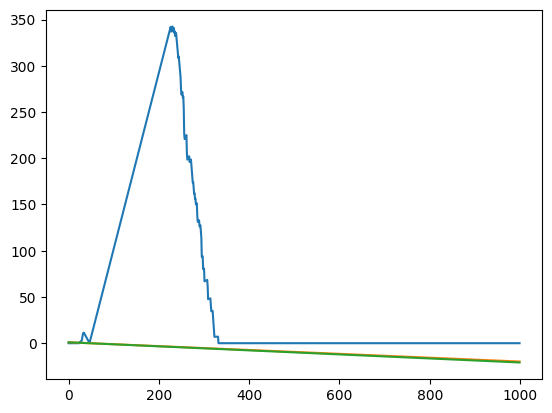

In [253]:
plt.plot(obj.loss_list)
plt.plot(obj.w1_list)
plt.plot(obj.w2_list)
plt.show()

In [254]:
obj.accuracy(y,X)

Accuracy : 0.6


0.6

In [ ]:
obj.y_pred_list

In [249]:
obj.predict([34.623660	,78.024693])

1.0
